In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.shape

(13200, 7)

In [7]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [10]:
min_threshold,max_threshold = df['price_per_sqft'].quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000099)

In [11]:
df[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [12]:
df[df['price_per_sqft']>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [13]:
df1 = df[(df['price_per_sqft']<max_threshold)&(df['price_per_sqft']>min_threshold)]
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [15]:
df1.shape

(13172, 7)

In [16]:
df.shape[0]-df1.shape[0]

28

In [18]:
upper_limit = df1.price_per_sqft.mean()+4*df1.price_per_sqft.std()
upper_limit

23227.73653589429

In [19]:
lower_limit = df1.price_per_sqft.mean()-4*df1.price_per_sqft.std()
lower_limit

-9900.429065502549

In [20]:
df1[df1['price_per_sqft']>upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [21]:
df1[df1['price_per_sqft']<lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [23]:
df2 = df1[(df1['price_per_sqft']>lower_limit)&(df1['price_per_sqft']<upper_limit)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [24]:
df2.shape

(13047, 7)

In [26]:
df1.shape[0]-df2.shape[0]

125

Text(0, 0.5, 'count')

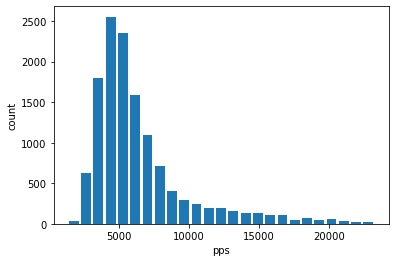

In [31]:
plt.hist(df2['price_per_sqft'],bins = 25,rwidth = 0.8)
plt.xlabel('pps')
plt.ylabel('count')

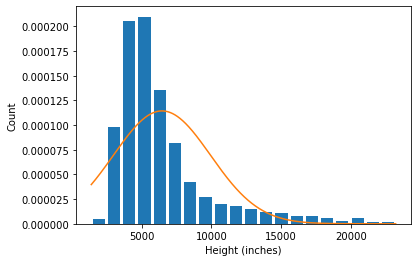

In [54]:
from scipy.stats import norm

plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

In [55]:
df1['zscore'] = (df1.price_per_sqft-df1.price_per_sqft.mean())/df1.price_per_sqft.std()
df1.sample(10)

<ipython-input-55-1ad96b9b1fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = (df1.price_per_sqft-df1.price_per_sqft.mean())/df1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
69,other,3 Bedroom,500.0,3.0,100.00,3,20000,3.220546
312,other,5 Bedroom,1200.0,5.0,180.00,5,15000,2.013114
7938,AECS Layout,2 BHK,1308.0,2.0,60.00,2,4587,-0.501484
2198,other,2 BHK,1316.0,2.0,55.50,2,4217,-0.590833
12305,other,3 BHK,1550.0,2.0,70.00,3,4516,-0.518629
6714,Binny Pete,3 BHK,1795.0,3.0,139.00,3,7743,0.260647
12433,Sarjapur Road,3 BHK,1660.0,2.0,116.00,3,6987,0.078084
10738,Raja Rajeshwari Nagar,3 BHK,1260.0,2.0,62.00,3,4920,-0.421069
3347,Mysore Road,3 BHK,1340.0,2.0,64.31,3,4799,-0.450288
1365,other,3 Bedroom,3329.0,3.0,330.00,3,9912,0.784431


In [57]:
df1[(df1.zscore < -4) | (df1.zscore>4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [60]:
df3 = df1[(df1.zscore>-4)&(df1.zscore<4)]
df3.shape

(13047, 8)

In [61]:
df1.shape[0]-df3.shape[0]

125